In [108]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns
from sklearn.decomposition import PCA
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
from scipy.stats import zscore
from sklearn.decomposition import PCA
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.graphics.factorplots import interaction_plot

In [98]:
df=  pd.read_csv('C:\\Users\\amvi\\Downloads\\SalaryData.csv')
df.head(10)

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769
5,Doctorate,Sales,219420
6,Doctorate,Sales,237920
7,Doctorate,Sales,160540
8,Doctorate,Sales,180934
9,Doctorate,Prof-specialty,248156


Problem 1A:

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]
 
 
1.State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

2.Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

3.Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

4.If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

# State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.



Null Hypothesis for Education :

H0-The means of 'Salary' with respect to each education is equal. 
H1- At least one of means of 'Salary' with respect to each education is unequal.

Null Hypothesis for Occupation :

H0-The means of 'Salary' with respect to each Occupation is equal.
H1- At least one of means of 'Salary' with respect to each Occupation is unequal.

In [9]:
#Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

print('Since in the result we could see that the p value is less than alpha(0.05) we reject the null hypothesis.')

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN
Since in the result we could see that the p value is less than alpha(0.05) we reject the null hypothesis.


In [10]:
#Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)
print('Since in the result we could observe that the p value is greater than alpha(0.05) we fail to reject the null hypothesis.')

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN
Since in the result we could observe that the p value is greater than alpha(0.05) we fail to reject the null hypothesis.


In [13]:
#If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)
compare = MultiComparison(df['Salary'], df['Education'])
result = compare.tukeyhsd()
print(result)
print ('')

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


Problem 1B:

1.What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

2.Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

3.Explain the business implications of performing ANOVA for this particular case study.

In [ ]:
#1.What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

In [17]:
#1.What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]
df.Occupation=df.Occupation.astype(str)
df.Education =df.Education .astype(str)


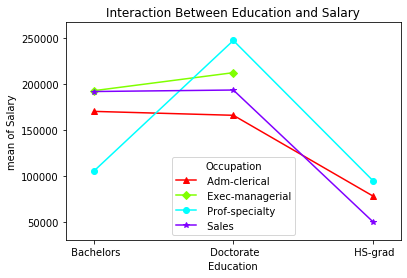

In [18]:
interaction_plot(df.Education,df.Occupation,df.Salary,markers=('^','D','o','*'),legendloc='best');
plt.title('Interaction Between Education and Salary');

From the above interaction plot, a very good interaction between Doctorate and bachelors in the occupation of Adm-clerical and Sales could be observed.

An analogous interaction between Bachelors and HS-grad in the occupation of Prof-specialty is seen.

No interaction between Doctorate and HS-grad in any of the occupation could be observed.

In [33]:
#2.Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?
print ('H0-The means of Salary with respect to each Education category and Occupation is equal.')
print ('H1- At least one of means of Salary with respect to each Education category and Occupation is unequal.')




H0-The means of Salary with respect to each Education category and Occupation is equal.
H1- At least one of means of Salary with respect to each Education category and Occupation is unequal.


In [36]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)





,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,31.257677,1.981539e-08
C(Occupation),3.0,5.519946e+09,1.839982e+09,1.120080,3.545825e-01
Residual,34.0,5.585261e+10,1.642724e+09,NaN,NaN


From the result it could be interpreted that-

For Education category p value is less than alpha (0.05) so we reject null hypothesis eshtablishing that Education has a significant imppact on mean salary.

For Occupation category p value is greater than alpha (0.05) so we fail to reject null hypothesis eshtablishing that Occupation does not have a significant imppact on mean salary.


In [101]:
formula = 'Salary~Education + Occupation + Education:Occupation'
model = ols(formula,df).fit()
aov_table=anova_lm(model)
print(aov_table)

                        df        sum_sq       mean_sq          F  \
Education              2.0  1.026955e+11  5.134773e+10  72.211958   
Occupation             3.0  5.519946e+09  1.839982e+09   2.587626   
Education:Occupation   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual              29.0  2.062102e+10  7.110697e+08        NaN   

                            PR(>F)  
Education             5.466264e-12  
Occupation            7.211580e-02  
Education:Occupation  2.232500e-05  
Residual                       NaN  


In [102]:
formula = 'Salary~Education:Occupation'
model = ols(formula,df).fit()
aov_table=anova_lm(model)
print(aov_table)

                        df        sum_sq       mean_sq          F  \
Education:Occupation  11.0  1.438019e+11  1.307290e+10  18.384842   
Residual              29.0  2.062102e+10  7.110697e+08        NaN   

                            PR(>F)  
Education:Occupation  3.340466e-10  
Residual                       NaN  


#3.Explain the business implications of performing ANOVA for this particular case study.

From the above ANOVA analysis we coud state that ;
    
An employee or a graduate's salary is significantly dependent on their level of education as compared to their occupation.

From the statistical conclusion about the interaction effect of education and occupation on salary we could say that despite occupation’s lesser significance, there is some level of impact of job role on salary


It is obvious that on an average a Doctorate should probably earn higher salary than Bachelors and HS-grads. However, it is also true that being a Doctorate may not necessarily mean Significantly higher salary.

Hence, there should be  more comprehensive approach towards setting of salary ranges.



Problem 2:

The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

1.Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

2.Is scaling necessary for PCA in this case? Give justification and perform scaling.

3.Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].

4.Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]

5.Extract the eigenvalues and eigenvectors.[Using Sklearn PCA Print Both]

6.Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

7.Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

8.Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

9.Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

In [103]:
df=  pd.read_csv("C:\\Users\\amvi\\Downloads\\Education+-+Post+12th+Standard.csv")
df

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


# 1.Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

Univariate analysis:

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Names          777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.4+ KB


In [40]:
df.shape

(777, 18)

In [41]:
df.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [112]:
df.drop('Names', axis = 1, inplace = True)

In [113]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [46]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [136]:
df.isnull().sum()

Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

    The Education data set has 777 rows and 18 columns
    One categorical columns (Names) and 17 numerical columns.
    All the values are on int64 type except ‘Names’ which is of object datatype and ‘S.F.Ratio’ which is of
    float64 datatype.
    We dont have any null/missing values
    We didnt observe any duplicated values
   

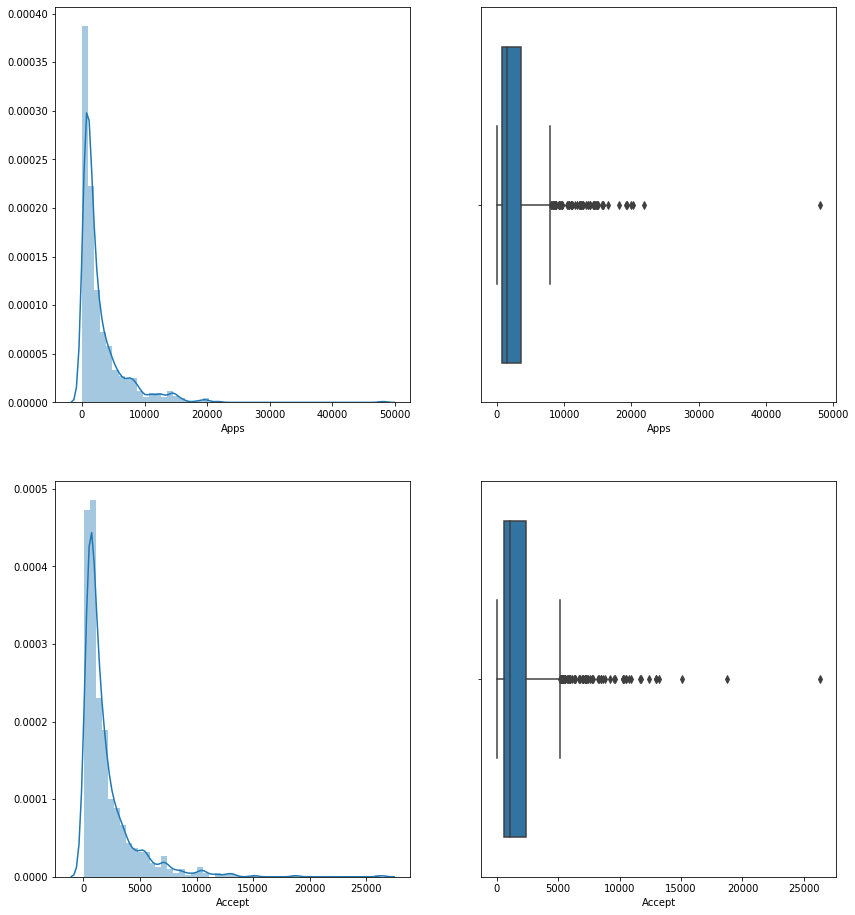

In [64]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(14,16)


sns.distplot(df['Apps'],ax=axes[0][0]
sns.boxplot (df['Apps'],orient= 'H', ax=axes[0][1])

sns.distplot(df['Accept'],ax=axes[1][0])
sns.boxplot (df['Accept'],orient= 'H', ax=axes[1][1])

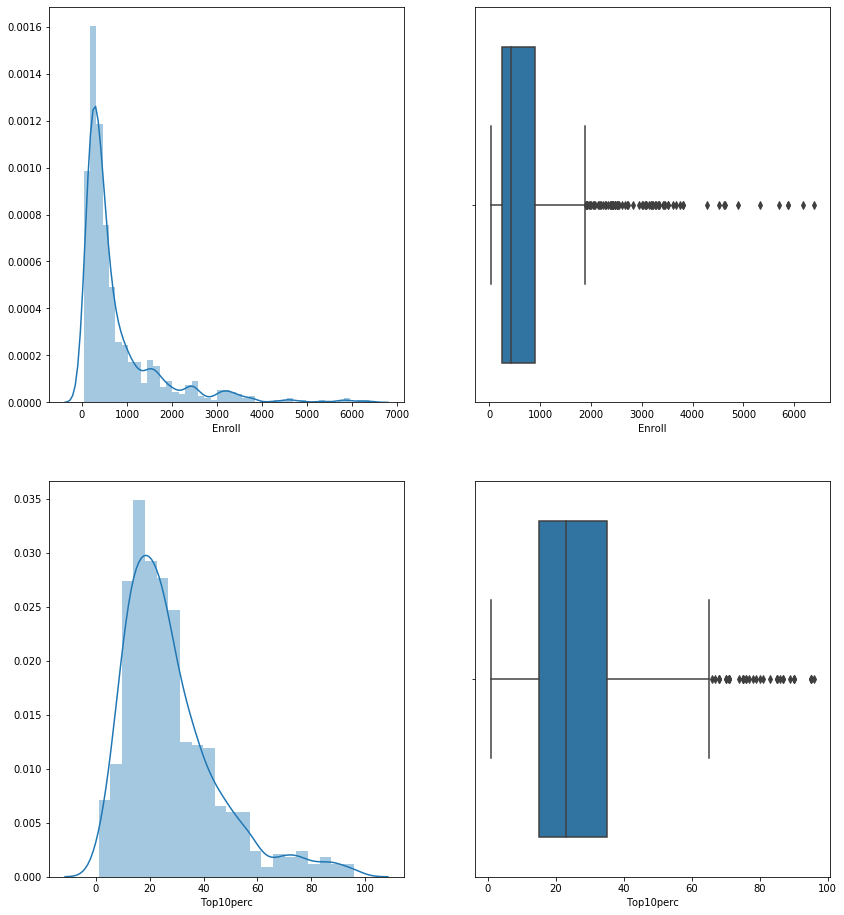

In [72]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(14,16)

sns.distplot(df['Enroll'],ax=axes[0][0])
sns.boxplot (df['Enroll'],orient= 'V', ax=axes[0][1])

sns.distplot(df['Top10perc'],ax=axes[1][0])
sns.boxplot (df['Top10perc'],orient= 'V', ax=axes[1][1])


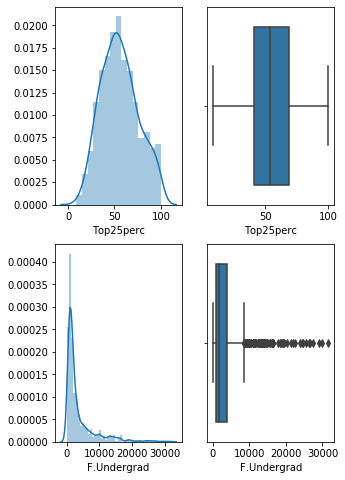

In [147]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(5,8)

sns.distplot(df['Top25perc'],ax=axes[0][0])
sns.boxplot (df['Top25perc'],orient= 'V', ax=axes[0][1])

sns.distplot(df['F.Undergrad'],ax=axes[1][0])
sns.boxplot (df['F.Undergrad'],orient= 'H', ax=axes[1][1])

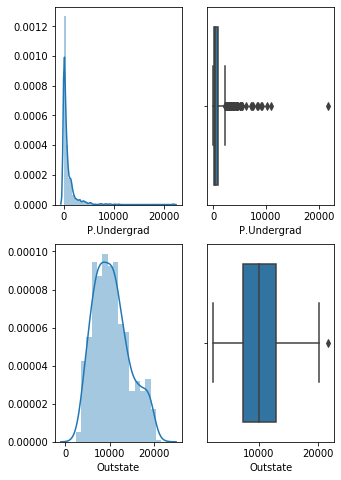

In [148]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(5,8)

sns.distplot(df['P.Undergrad'],ax=axes[0][0])
sns.boxplot (df['P.Undergrad'],orient= 'H', ax=axes[0][1])

sns.distplot(df['Outstate'],ax=axes[1][0])
sns.boxplot (df['Outstate'],orient= 'V', ax=axes[1][1])


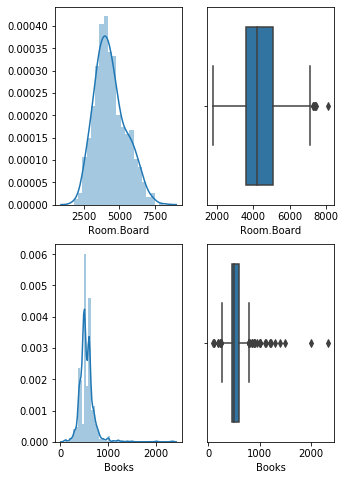

In [149]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(5,8)

sns.distplot(df['Room.Board'],ax=axes[0][0])
sns.boxplot (df['Room.Board'],orient= 'H', ax=axes[0][1])

sns.distplot(df['Books'],ax=axes[1][0])
sns.boxplot (df['Books'],orient= 'H', ax=axes[1][1])


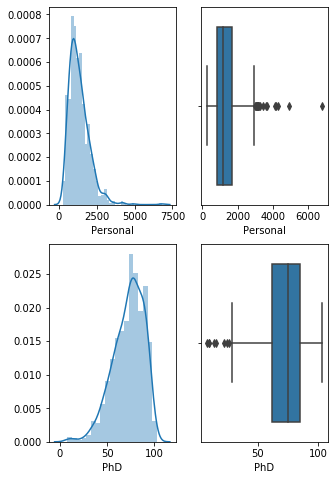

In [150]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(5,8)

sns.distplot(df['Personal'],ax=axes[0][0])
sns.boxplot (df['Personal'],orient= 'H', ax=axes[0][1])

sns.distplot(df['PhD'],ax=axes[1][0])
sns.boxplot (df['PhD'],orient= 'H', ax=axes[1][1])


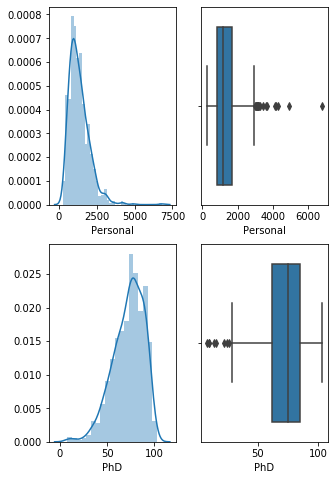

In [151]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(5,8)

sns.distplot(df['Personal'],ax=axes[0][0])
sns.boxplot (df['Personal'],orient= 'H', ax=axes[0][1])

sns.distplot(df['PhD'],ax=axes[1][0])
sns.boxplot (df['PhD'],orient= 'H', ax=axes[1][1])

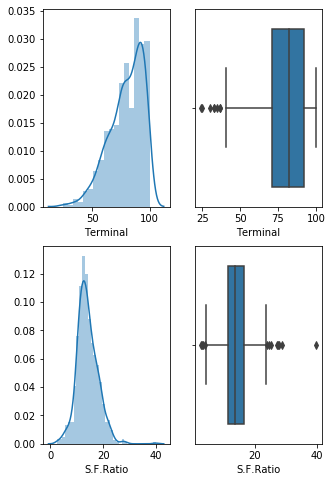

In [152]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(5,8)

sns.distplot(df['Terminal'],ax=axes[0][0])
sns.boxplot (df['Terminal'],orient= 'H', ax=axes[0][1])

sns.distplot(df['S.F.Ratio'],ax=axes[1][0])
sns.boxplot (df['S.F.Ratio'],orient= 'H', ax=axes[1][1])

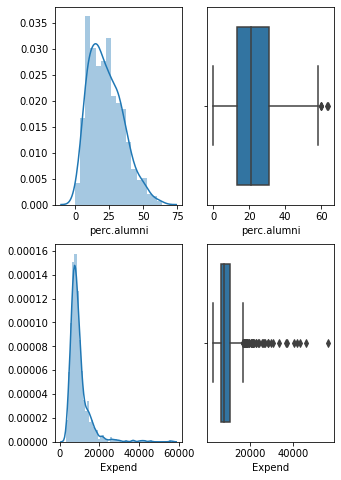

In [153]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(5,8)

sns.distplot(df['perc.alumni'],ax=axes[0][0])
sns.boxplot (df['perc.alumni'],orient= 'H', ax=axes[0][1])

sns.distplot(df['Expend'],ax=axes[1][0])
sns.boxplot (df['Expend'],orient= 'V', ax=axes[1][1])



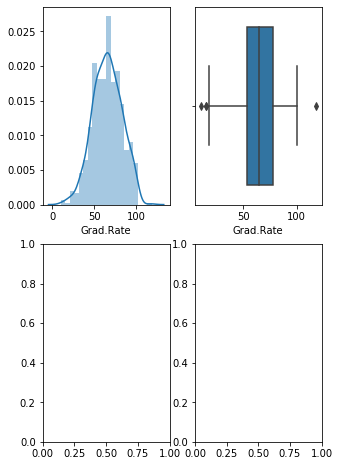

In [154]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(5,8)

sns.distplot(df['Grad.Rate'],ax=axes[0][0])
sns.boxplot (df['Grad.Rate'],orient='H',ax=axes[0][1])

In [93]:
df.skew(axis = 0, skipna = True) 

Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64

 From above distplots it is clear that  that the data is highly skewed. 
 we use skewness to understand which data set is normally distributed and which is not. If the skewness =0, It is said to be normally distributed, if it is >0 it is left skewed and if it <O it is skewed towards right.

Skewness calculated suggests that we have right skewed, left skewed and symmetrical data.
    •	3 - Symmetrical data about its axis
    •	12- Right skewed 
    •	2 - Left skewed
    
 it is also observed from the above boxplots that outliers present in every column value in the dataset except in  'Top25perc'.


# Multivariate Analysis

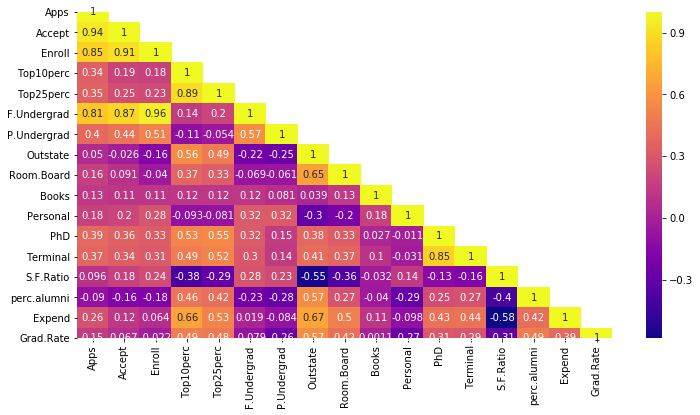

In [94]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='plasma',fmt='.2g',annot=True,mask=np.triu(df.corr(),+1))
plt.show()

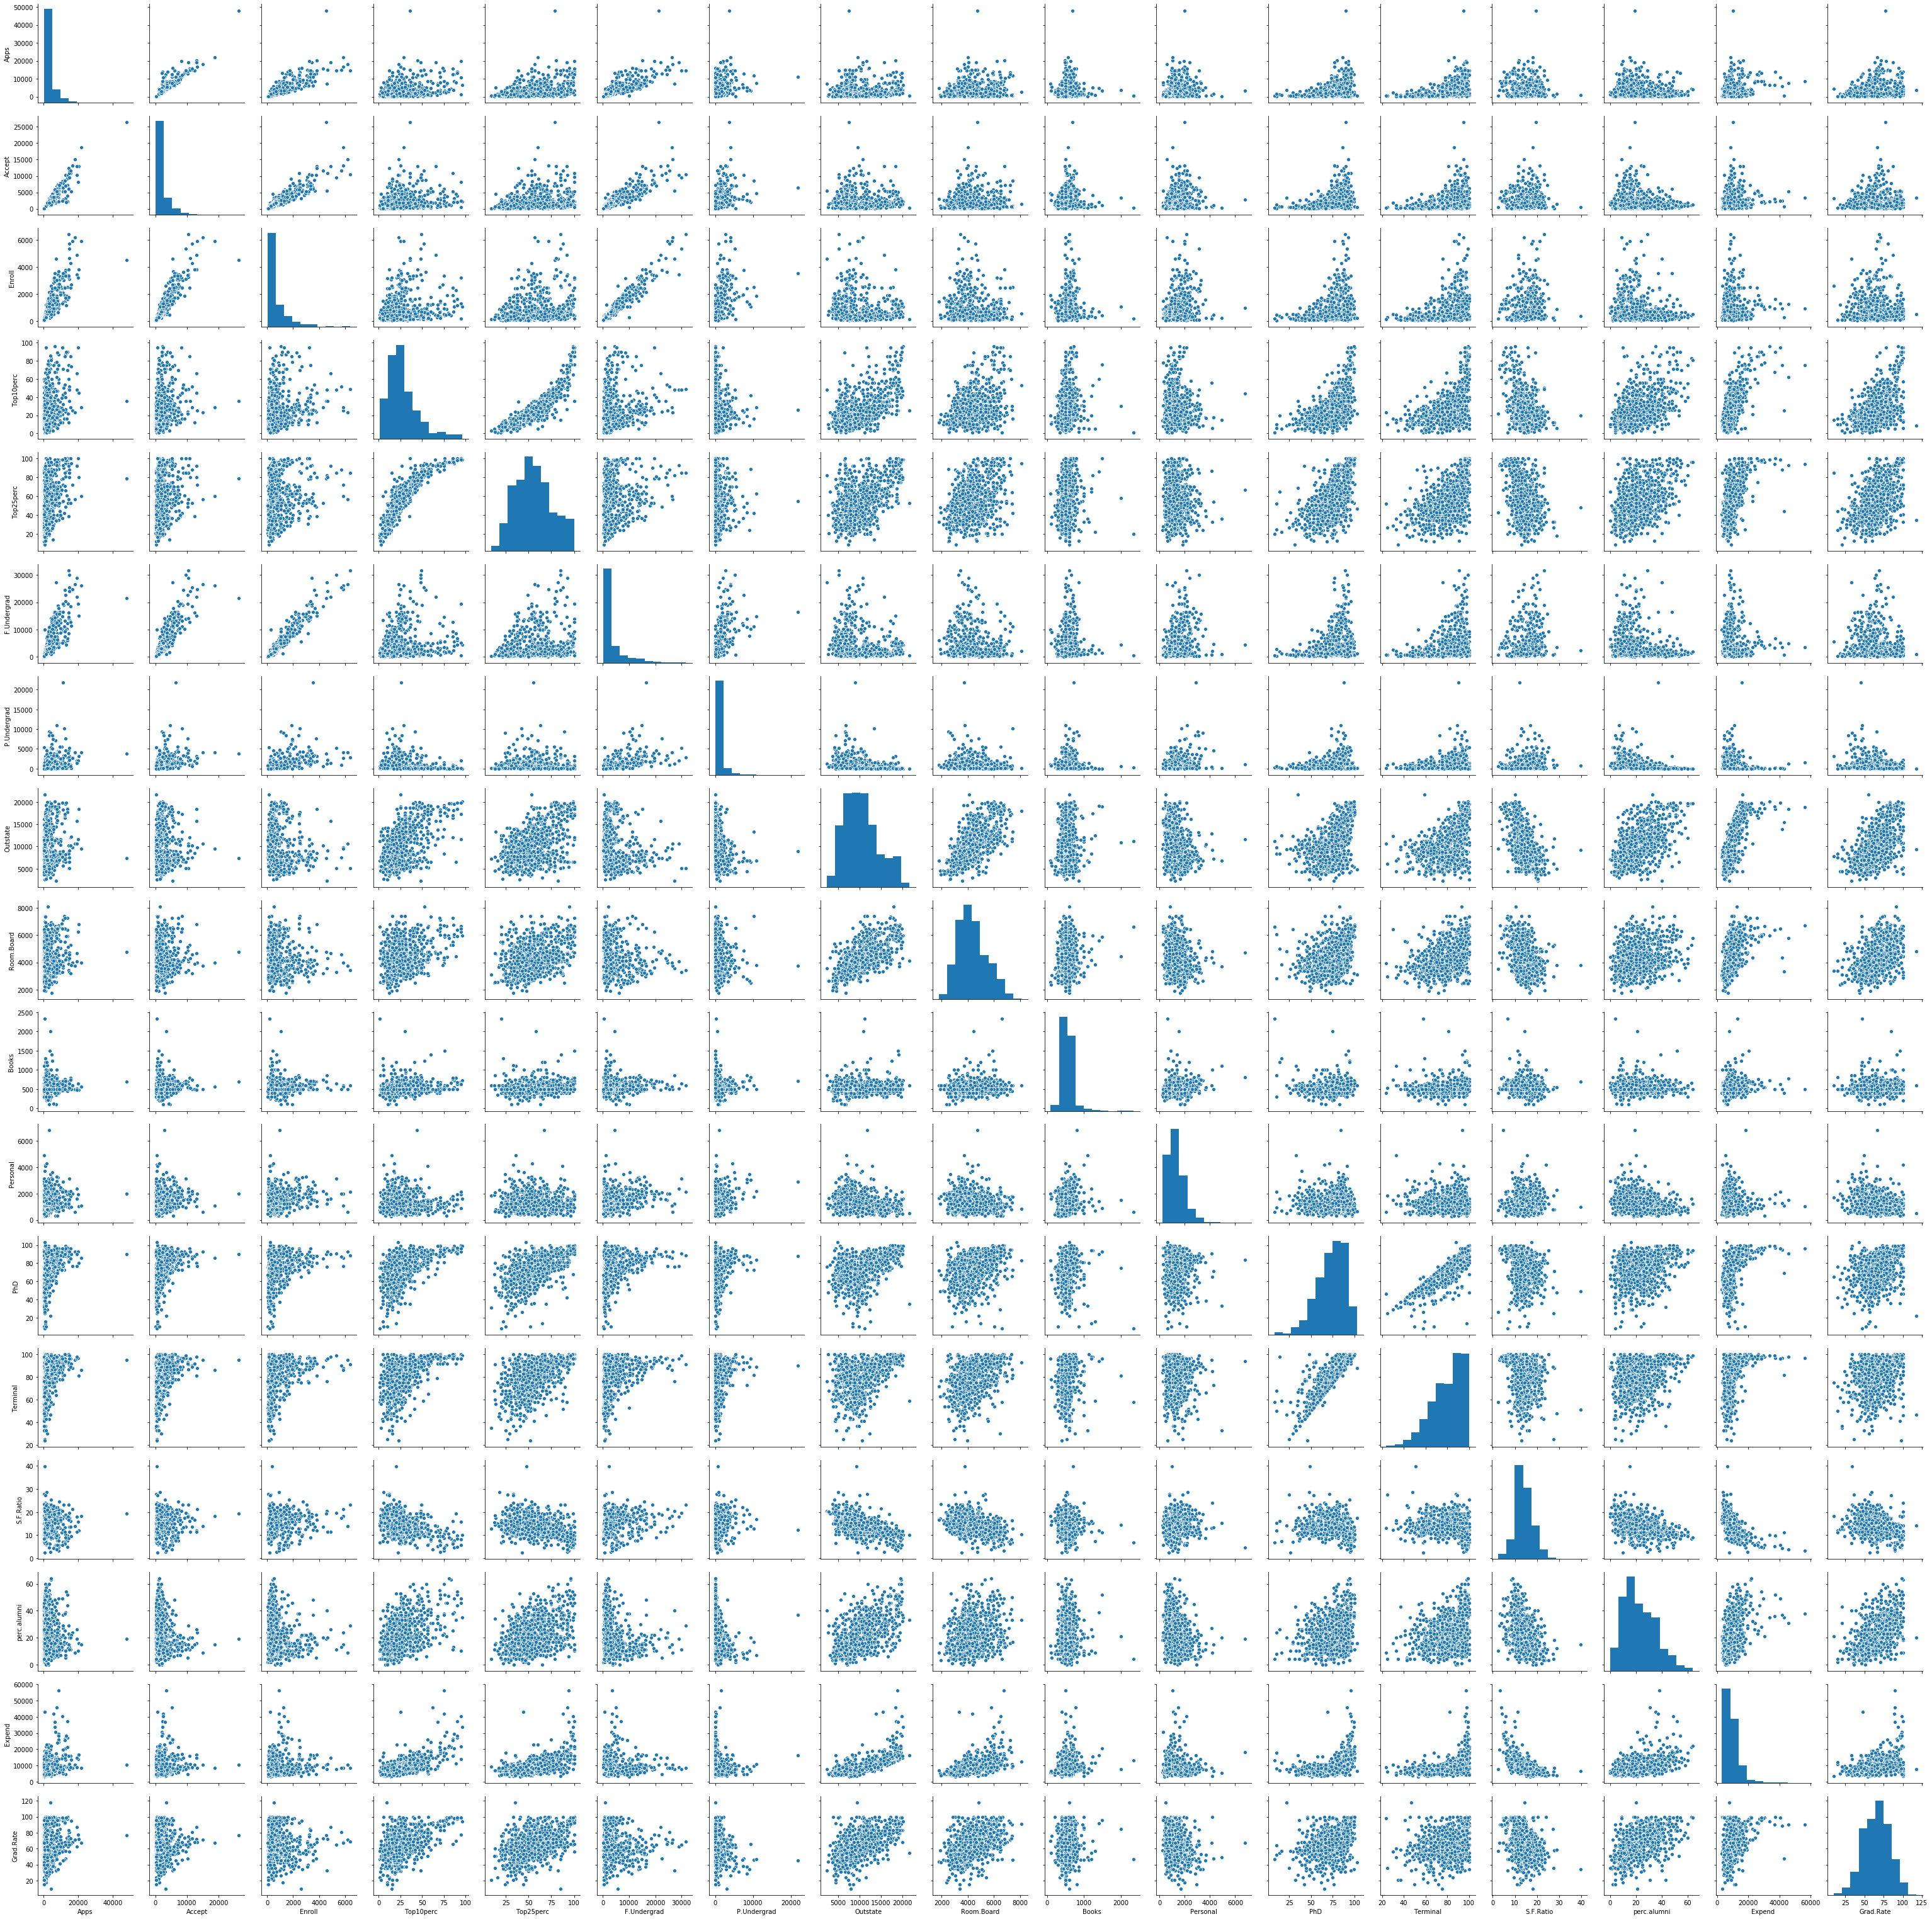

In [95]:
sns.pairplot(df)
plt.show()

### Inference Multivariate 

  
    
    The heatmap shows strong correlation(>.85) between ; 
    •	Accept/Apps 
    •	Accept/Enroll
    •	Apps/Enroll
    •	Top25perc/Top10perc
    •	F.Undergrad/Apps/Accept/Enroll
    •	Terminal/PhD
    
   Similarly from the pairplot we observe  the same by establishing a linear relationship between the above mentioned    strongly correlated variables and a highly scattered plot in all other scenarios.


# 2.Is scaling necessary for PCA in this case? Give justification and perform scaling.

Yes we need to scale the data here.Feature scaling through standardization (or Z-score normalization) is an an important preprocessing step as it involves rescaling the features of the data , such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one hence normalizing a data within a particular range.It also helps in speeding up the calculations in an algorithm.



In [155]:

from scipy.stats import zscore
df1=df.apply (zscore)
df1.head(10).T

,0,1,2,3,4,5,6,7,8,9
Apps,-0.346882,-0.210884,-0.406866,-0.668261,-0.726176,-0.624307,-0.684808,-0.285088,-0.507700,-0.625600
Accept,-0.321205,-0.038703,-0.376318,-0.681682,-0.764555,-0.628611,-0.685356,-0.121984,-0.481644,-0.620854
Enroll,-0.063509,-0.288584,-0.478121,-0.692427,-0.780735,-0.669812,-0.729043,-0.313353,-0.595505,-0.654735
Top10perc,-0.258583,-0.655656,-0.315307,1.840231,-0.655656,0.592287,-0.598931,0.535563,0.138490,-0.372032
Top25perc,-0.191827,-1.353911,-0.292878,1.677612,-0.596031,0.313426,-0.545505,0.616579,0.363952,-0.596031
F.Undergrad,-0.168116,-0.209788,-0.549565,-0.658079,-0.711924,-0.623421,-0.677472,-0.434450,-0.562562,-0.598459
P.Undergrad,-0.209207,0.244307,-0.497090,-0.520752,0.009005,-0.535212,-0.410988,-0.541127,-0.361036,-0.510893
Outstate,-0.746356,0.457496,0.201305,0.626633,-0.716508,0.760947,0.708713,0.852479,1.282036,0.006798
Room.Board,-0.964905,1.909208,-0.554317,0.996791,-0.216723,-0.932970,1.243144,0.427443,0.038754,-0.891911
Books,-0.602312,1.215880,-0.905344,-0.602312,1.518912,-0.299280,-0.299280,-0.602312,-1.511408,0.670422


# 3.Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].

In [115]:
cov_matrix=np.cov(df1.T)
cov_matrix

array([[ 1.00128866,  0.94466636,  0.84791332,  0.33927032,  0.35209304,
         0.81554018,  0.3987775 ,  0.05022367,  0.16515151,  0.13272942,
         0.17896117,  0.39120081,  0.36996762,  0.09575627, -0.09034216,
         0.2599265 ,  0.14694372],
       [ 0.94466636,  1.00128866,  0.91281145,  0.19269493,  0.24779465,
         0.87534985,  0.44183938, -0.02578774,  0.09101577,  0.11367165,
         0.20124767,  0.35621633,  0.3380184 ,  0.17645611, -0.16019604,
         0.12487773,  0.06739929],
       [ 0.84791332,  0.91281145,  1.00128866,  0.18152715,  0.2270373 ,
         0.96588274,  0.51372977, -0.1556777 , -0.04028353,  0.11285614,
         0.28129148,  0.33189629,  0.30867133,  0.23757707, -0.18102711,
         0.06425192, -0.02236983],
       [ 0.33927032,  0.19269493,  0.18152715,  1.00128866,  0.89314445,
         0.1414708 , -0.10549205,  0.5630552 ,  0.37195909,  0.1190116 ,
        -0.09343665,  0.53251337,  0.49176793, -0.38537048,  0.45607223,
         0.6617651 

In [157]:
df1.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


Correlation is a scaled version of covariance the two parameters always have the same sign positive negative or 0. 
Positive sign indicates  positively corelated variables,negative sign indicates negatively corelated variables and 0 indicates uncorrelated. 

Correlation measures both strength and direction of the linear relationship between two variables whereas covariance indicates the direction of the linear relationship of the variables

# 4.Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless 

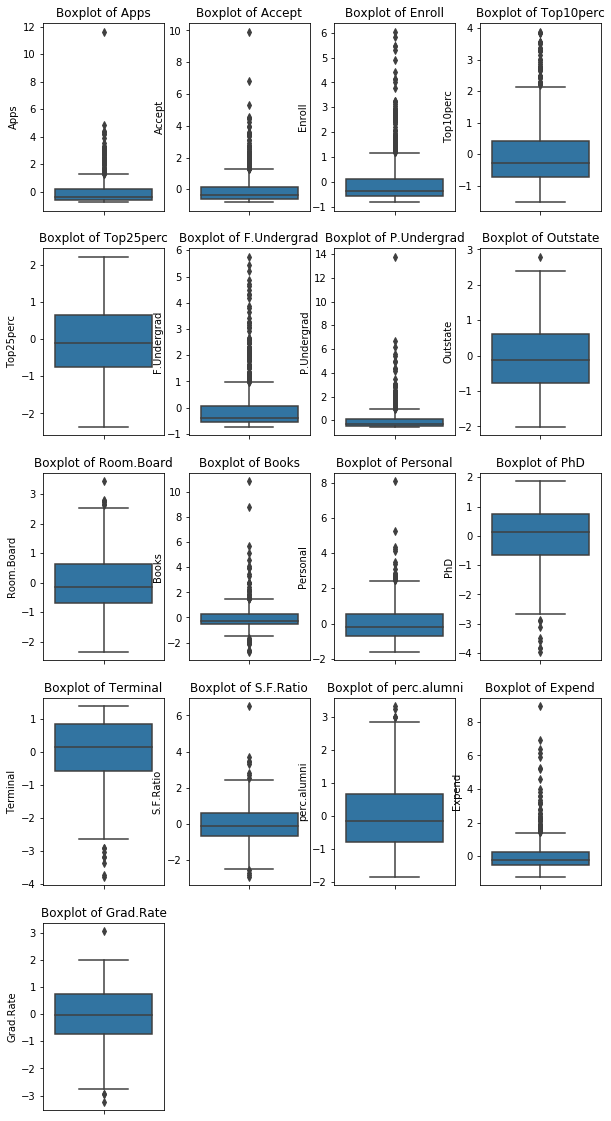

In [159]:
#Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]

plt.figure(figsize =(10,20))
feature_list = df1.columns
for i in range(len(feature_list)):
    plt.subplot(5,4, i + 1)
    sns.boxplot(y = df1[feature_list[i]], data =df1)
    plt.title('Boxplot of {}'.format(feature_list[i]));
    plt.tight_layout

Initially while doing univariate analysis we have checked for outliers and except Top25perc presence of outliers were found in all other 16 variables.

After scaling again the data was analysed for outliers we could observe that there was not much difference  as presence of outliers were still found  in the data.

Outliers could be removed by treating them.(But as it is not specifically asked in the question we will skip the step of treating the outliers)




# 5.Extract the eigenvalues and eigenvectors.[Using Sklearn PCA Print Both]

In [143]:
eig_vectors=pca.components_
eig_values=pca.explained_variance_
print ('\n Eigen Values \n %s', eig_vals)
print ('\n Eigen Vectors \n %s', eig_vecs)



 Eigen Values 
 %s [5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.02302787 0.03672545
 0.31344588 0.08802464 0.1439785  0.16779415 0.22061096]

 Eigen Vectors 
 %s [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6

# 6.#Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features


#Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

If we don't have any strict constraints, then we should plot the cumulative sum of eigenvalues.
If we divide each value by the total sum of eigenvalues prior to plotting, then our plot will show the fraction
of total variance retained vs. number of eigenvalues. The plot will then provide a good indication of when we will he point of diminishing returns.

In [119]:

total=sum(eig_vals)
var_exp = [(i / total) for i in sorted(eig_vals, reverse=True)]
var_exp

[0.3202062819886915,
 0.26340214436112463,
 0.06900916554222497,
 0.05922989222926289,
 0.054884051103584804,
 0.0498470095455745,
 0.0355887149174665,
 0.03453621336999264,
 0.031172336798217196,
 0.023751915258937994,
 0.01841426320938688,
 0.012960414001235345,
 0.00985754122800116,
 0.008458423350830023,
 0.005171255833731941,
 0.002157540100727585,
 0.0013528371610095184]

In [120]:
##Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

##### we will perform a screeplot as a screeplot assists in visualizing the relative importance of the factors a sharp drop in the plot signals that subsequent factors are ignorable. 


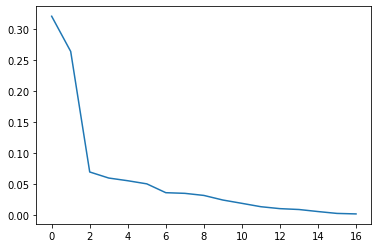

In [121]:
plt.plot(var_exp)

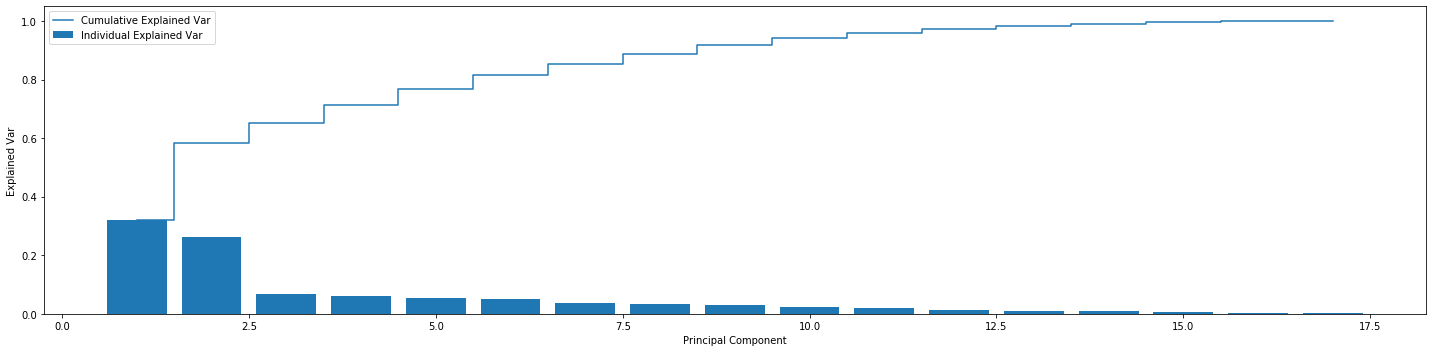

In [122]:
plt.figure(figsize = (20,5))
plt.bar(range(1,eig_vals.size+1),var_exp,align='center',label='Individual Explained Var')
plt.step(range(1,eig_vals.size+1),cum_var_exp,where='mid',label= 'Cumulative Explained Var')
plt.ylabel('Explained Var')
plt.xlabel('Principal Component')
plt.legend(loc='best')
plt.tight_layout()

In [123]:
#To find PCA components we use PCA commands from SKlearn

pca=PCA(n_components=7,random_state=123)
pca_transformed=pca.fit_transform(df1)
pca_transformed

array([[-1.59285540e+00,  7.67333510e-01, -1.01073537e-01, ...,
        -7.43975398e-01, -2.98306081e-01,  6.38443468e-01],
       [-2.19240180e+00, -5.78829984e-01,  2.27879812e+00, ...,
         1.05999660e+00, -1.77137309e-01,  2.36753302e-01],
       [-1.43096371e+00, -1.09281889e+00, -4.38092811e-01, ...,
        -3.69613274e-01, -9.60591689e-01, -2.48276091e-01],
       ...,
       [-7.32560596e-01, -7.72352397e-02, -4.05641899e-04, ...,
        -5.16021118e-01,  4.68014248e-01, -1.31749158e+00],
       [ 7.91932735e+00, -2.06832886e+00,  2.07356368e+00, ...,
        -9.47754745e-01, -2.06993738e+00,  8.33276555e-02],
       [-4.69508066e-01,  3.66660943e-01, -1.32891515e+00, ...,
        -1.13217594e+00,  8.39893087e-01,  1.30731260e+00]])

In [142]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131053,  0.26781735,  0.16182677, -0.05154725, -0.10976654,
         0.10041234, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

In [144]:
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 ])

In [126]:
##Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871])

In [127]:
var=np.cumsum(np.round(pca.explained_variance_ratio_,3))*100
var

array([32. , 58.3, 65.2, 71.1, 76.6, 81.6, 85.2])

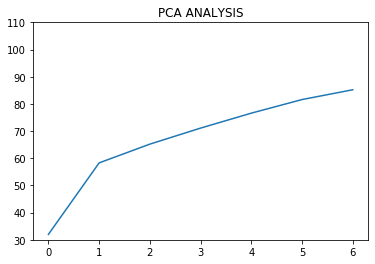

In [128]:
plt.title('PCA ANALYSIS')
plt.ylim(30,110)
plt.plot(var)
#plt.ylabel('% var explained')
#plt.xlabel('PC')

In [139]:
df1_pccomp = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7'],
                                    index = df1.columns)
df1_pccomp.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237,-0.042486
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535,-0.012950
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558,-0.027693
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693,-0.161332
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092,-0.118486


# Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]

# Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [138]:
var=np.cumsum(np.round(pca.explained_variance_ratio_,3))*100
var

array([32. , 58.3, 65.2, 71.1, 76.6, 81.6, 85.2])

The Cumulative % gives the percentage of variance accounted for by the n components. 
It aids in deciding the number of components by selecting the components which explained the high variance.To decide how many eigenvalues/eigenvectors to keep.

In the above array we see that the first feature explains 32.0 % of the variance within our data set while the second and 
third one  explain 58.3% ,65.2% respectively and so on. If we take on all the  7 features we capture ~ 85.2% of the variance within the dataset.



9.Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

Principal component analysis (PCA) is a technique for reducing the dimensionality of large datasets and increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

It uses orthogonal transformation to convert a set of observations ofpossibly correlated variables into a set of values of linearly uncorrelated variables.

Here in the dataset there were 18 variable where after applying PCA they were reduced to only 7  components capturing  ~ 85.2% of the variance within the dataset. -